In [33]:
#importing models
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing sklearn models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [34]:
#Things to do
#choose relevent columns
#get dummy data
#train test split
#multiple linear regression
#lasso regression
#random forest
#tune model using gridsearch cv
#test ensembles

In [35]:
# 2019 cleaned data for machine learning
path_2019=os.path.join('output_census', 'ca_2019_ml.csv')
ca_2019=pd.read_csv(path_2019)

In [36]:
#columns of our data sets
ca_2019.columns

Index(['City', 'Population', 'House Value', 'Household Income', 'Poverty Rate',
       'Unemployment Rate', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate', 'College Rate',
       'White Population Rate', 'Uneducated Rate'],
      dtype='object')

In [37]:
#seting city as a index
ca_2019.set_index('City', inplace=True)

#### Prepare a feature matrix (X) and response (y)  for scikit-learn.

In [38]:
# create feature matrix (X)
#selecting all columns except 'House Value'
X=ca_2019.drop('House Value', axis=1) 

# create response vector (y)
##selecting 'House Value'
y=ca_2019['House Value'].values  

#### Scaling using standard scaler on feature matrix (X) 

In [39]:
#Different columns have differnt scale so standrazied it 
#features scaling using standard scaler on x only
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
scaled_X=std_scaler.fit_transform(X)

In [40]:
#shape of the X and y
print(scaled_X.shape)
print(y.shape)

(1460, 11)
(1460,)


#### Splitting data in train and test set.

In [41]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(
                               scaled_X, y, test_size=0.2, random_state=42)

#### Evaluation Metric

To evaluate a model, we also need an **evaluation metric:**

- A numeric calculation used to **quantify** the performance of a model.
- The appropriate metric depends on the **goals** of your problem.

The most common choices for regression problems are:

- **R-squared**: The percentage of variation explained by the model (a "reward function," as higher is better).
- **Mean squared error**: The average squared distance between the prediction and the correct answer (a "loss function," as lower is better).
- **Mean absolute error**: The average absolute distance between the prediction and the correct answer (a "loss function," as lower is better).

In this case, we'll use mean squared error, R2, and mean absolute error because it is more interpretable in a predictive context.

## Linear Regression

In [42]:
#using linear regression
# Make a linear regression instance
lr=LinearRegression()
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
lr.fit(X_train, y_train)


LinearRegression()

In [43]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr.score(X_train, y_train)}')
print(f'R2 Score of testing  set  {lr.score(X_test, y_test)}')

R2 Score of training set 0.8607789185273351
R2 Score of testing  set  0.8241552523056297


#### Create a cross-valiation with five folds.
-  Cross valiation allows the training set into distinct subsets called folds.
- A model is trained using k-1 of the folds as training data

In [44]:
cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

array([-96770.77735665, -91440.28913294, -98186.66455641, -89568.07046732,
       -85129.35208968])

In [45]:
lr_r2=np.mean(cross_val_score(lr, X, y, cv=5))
print(f'The R2 of Linear Regression is {lr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_mse=np.mean(cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error'))
lr_rmse=np.sqrt(-(lr_mse))
print(f'The mean squared error of Linear Regression is {lr_rmse}')

#mean absolute error
lr_mae=np.mean(cross_val_score(lr, X, y, cv=5, scoring='neg_mean_absolute_error'))
lr_mae=(-(lr_mae))
print(f'The mean squared error of Linear Regression is {lr_mae}')

The R2 of Linear Regression is 0.7665757066684497
The mean squared error of Linear Regression is 153779.66110982996
The mean squared error of Linear Regression is 98881.91453360615


## Laso Regression

In [46]:
#using lassoregression(lasso make some features going to exactly zero)
#alpha=0 no regularization( all features are used)
# Make a lasso regression instance
lr_l=Lasso()
lr_l.fit(X_train, y_train)


Lasso()

In [47]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr_l.score(X_train, y_train)}')
print(f'R2 Score of testing set  {lr_l.score(X_test, y_test)}')

R2 Score of training set 0.860778918260464
R2 Score of testing set  0.8241560622762453


#### Create a cross-valiation with five folds.

In [48]:
cross_val_score(lr_l, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-95308.33155207, -93686.34282313, -85900.96676039])

In [49]:
lr_l_r2=np.mean(cross_val_score(lr_l, X, y, cv=5))
print(f'The R2 of Lasso Regression is {lr_l_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_l_mse=np.mean(cross_val_score(lr_l, X, y, cv=5, scoring='neg_mean_squared_error'))
lr_l_rmse=np.sqrt(-(lr_l_mse))
print(f'The mean squared error of Lasso Regression is {lr_l_rmse}')

#mean absolute error
lr_l_mae=np.mean(cross_val_score(lr_l, X, y, cv=5, scoring='neg_mean_absolute_error'))
lr_l_mae=(-(lr_l_mae))
print(f'The mean squared error of Lasso Regression is {lr_l_mae}')

The R2 of Lasso Regression is 0.7665757712338103
The mean squared error of Lasso Regression is 153779.6532495439
The mean squared error of Lasso Regression is 98881.80154688364


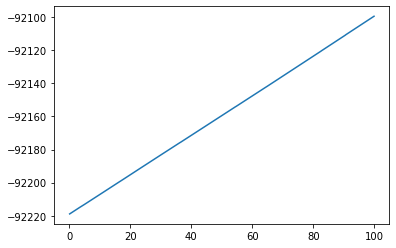

In [50]:
#choosing the best alpha
alpha=[]
error=[]
for i in range(1,1000):
    alpha.append(i/10)
    lrl=Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lrl, X_train, y_train, scoring='neg_mean_absolute_error',
                                         cv=5)))
plt.plot(alpha,error) 
plt.show()

In [51]:
#choosing the best alpha
lrl=Lasso(alpha=10)
lrl.fit(X_train, y_train)


Lasso(alpha=10)

In [52]:
#Printing the R2 score of test and train set 
print(f'R2 Score of training set with alpha 10 {lrl.score(X_train, y_train)}')
print(f'R2 Score of testing set with alpha 10 {lrl.score(X_test, y_test)}')

R2 Score of training set with alpha 10 0.860778892679362
R2 Score of testing set with alpha 10 0.8241627174082344


#### Create a cross-valiation with five folds.

In [53]:
cross_val_score(lr_l, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-95308.33155207, -93686.34282313, -85900.96676039])

In [54]:
lrl_r2=np.mean(cross_val_score(lrl, X, y, cv=5))
print(f'The R2 of Lasso Regression with alpha 10 is {lrl_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lrl_mse=np.mean(cross_val_score(lr_l, X, y, cv=5, scoring='neg_mean_squared_error'))
lrl_rmse=np.sqrt(-(lrl_mse))
print(f'The mean squared error of Lasso Regression with alpha 10 is {lrl_rmse}')

#mean absolute error
lrl_mae=np.mean(cross_val_score(lr_l, X, y, cv=5, scoring='neg_mean_absolute_error'))
lrl_mae=(-(lrl_mae))
print(f'The mean squared error of Lasso Regressionwith alpha 10 is {lrl_mae}')

The R2 of Lasso Regression with alpha 10 is 0.7665763503179452
The mean squared error of Lasso Regression with alpha 10 is 153779.6532495439
The mean squared error of Lasso Regressionwith alpha 10 is 98881.80154688364


## Decision Tree

In [55]:
# Make a decision tree instance
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
#Printing the score of test and train set
print(f'R2 Score of training set {dt.score(X_train, y_train)}')
print(f'R2 Score of testing set  {dt.score(X_test, y_test)}')

R2 Score of training set 1.0
R2 Score of testing set  0.8350837947698952


#### Create a cross-valiation with five folds.

In [57]:
cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-104530.54871795, -104193.86118252,  -92439.61696658])

In [58]:
dt_r2=np.mean(cross_val_score(dt, X, y, cv=5))
print(f'The R2 of Decision Tree Regressor is {dt_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
dt_mse=np.mean(cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error'))
dt_rmse=np.sqrt(-(dt_mse))
print(f'The mean squared error of Decision Tree Regressor is {dt_rmse}')

#mean absolute error
dt_mae=np.mean(cross_val_score(dt, X, y, cv=5, scoring='neg_mean_absolute_error'))
dt_mae=(-(dt_mae))
print(f'The mean squared error of Decision Tree Regressor is {dt_mae}')

The R2 of Decision Tree Regressor is 0.6126408087576757
The mean squared error of Decision Tree Regressor is 191037.10555742183
The mean squared error of Decision Tree Regressor is 110367.56369863013


### Tuning hyperparamaters  using Grid Search CV

In [59]:
parameters = {
              'max_depth':[4,6, 8,12],
              'min_samples_leaf':range(1,5)}
gs_dt=GridSearchCV(dt, param_grid=parameters, 
                    cv=3, verbose=1, n_jobs=-1)
gs_dt.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 12],
                         'min_samples_leaf': range(1, 5)},
             verbose=1)

In [60]:
#Best parameters
gs_dt.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

In [74]:
#best estimator
dt_b=gs_dt.best_estimator_
rf_b

RandomForestRegressor(max_features=8)

In [75]:
#printing the evaluation scores
cvres=gs_dt.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print((-mean_score), params)

-0.8302692146680579 {'max_depth': 4, 'min_samples_leaf': 1}
-0.8292044510251273 {'max_depth': 4, 'min_samples_leaf': 2}
-0.8299102807139563 {'max_depth': 4, 'min_samples_leaf': 3}
-0.8298112167115935 {'max_depth': 4, 'min_samples_leaf': 4}
-0.804609816155275 {'max_depth': 6, 'min_samples_leaf': 1}
-0.8088989208082181 {'max_depth': 6, 'min_samples_leaf': 2}
-0.8151787099102906 {'max_depth': 6, 'min_samples_leaf': 3}
-0.8214528885173255 {'max_depth': 6, 'min_samples_leaf': 4}
-0.8015913842927169 {'max_depth': 8, 'min_samples_leaf': 1}
-0.7967044647034499 {'max_depth': 8, 'min_samples_leaf': 2}
-0.8079159646417242 {'max_depth': 8, 'min_samples_leaf': 3}
-0.8164751200510737 {'max_depth': 8, 'min_samples_leaf': 4}
-0.7669834893683518 {'max_depth': 12, 'min_samples_leaf': 1}
-0.787972832375654 {'max_depth': 12, 'min_samples_leaf': 2}
-0.8019062962245612 {'max_depth': 12, 'min_samples_leaf': 3}
-0.8111302330069644 {'max_depth': 12, 'min_samples_leaf': 4}


## Random Forest

In [76]:
# Make a Random forest instance
rf=RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [77]:
#Printing the score of test and train set
print(f'R2 Score of training set {rf.score(X_train, y_train)}')
print(f'R2 Score of testing set {rf.score(X_test, y_test)}')

R2 Score of training set 0.9832197185166933
R2 Score of testing set 0.8859341741575314


#### Create a cross-valiation with five folds.

In [78]:
cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-83210.56710256, -77413.57917738, -69399.89789203])

In [79]:
rf_r2=np.mean(cross_val_score(rf, X, y, cv=5))
print(f'The R2 of Random Forest Regressor is {rf_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
rf_mse=np.mean(cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error'))
rf_rmse=np.sqrt(-(lrl_mse))
print(f'The mean squared error of Random Forest Regressor is {rf_rmse}')

#mean absolute error
rf_mae=np.mean(cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_error'))
rf_mae=(-(rf_mae))
print(f'The mean squared error of Random Forest Regressor is {rf_mae}')

The R2 of Random Forest Regressor is 0.8123497082504274
The mean squared error of Random Forest Regressor is 153779.6532495439
The mean squared error of Random Forest Regressor is 83180.49967123289


#### Tuning the hyperparameters using Grid Search CV

In [80]:
parameters = [{'n_estimators':[3,10,60,100,200],
              'max_features':[4,6,8,10]},
              {'bootstrap':[False], 'n_estimators':[3,10,100],
              'max_features':[4,6,8,10]}]
gs_rf=GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error',
                   cv=5, return_train_score=True)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 6, 8, 10],
                          'n_estimators': [3, 10, 60, 100, 200]},
                         {'bootstrap': [False], 'max_features': [4, 6, 8, 10],
                          'n_estimators': [3, 10, 100]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [84]:
#Best parameters
gs_rf.best_params_

{'max_features': 6, 'n_estimators': 200}

In [85]:
#best estimator
rf_b=gs_rf.best_estimator_
rf_b

RandomForestRegressor(max_features=6, n_estimators=200)

In [86]:
#printing the evaluation scores
cvres=gs_rf.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print((-mean_score), params)

92240.80794663928 {'max_features': 4, 'n_estimators': 3}
80045.21988334984 {'max_features': 4, 'n_estimators': 10}
74890.91331786556 {'max_features': 4, 'n_estimators': 60}
74848.34648508861 {'max_features': 4, 'n_estimators': 100}
74475.55926325153 {'max_features': 4, 'n_estimators': 200}
91217.45859897534 {'max_features': 6, 'n_estimators': 3}
78427.67600895051 {'max_features': 6, 'n_estimators': 10}
74297.56067874741 {'max_features': 6, 'n_estimators': 60}
74085.76013227689 {'max_features': 6, 'n_estimators': 100}
73892.36340684493 {'max_features': 6, 'n_estimators': 200}
82502.78402479734 {'max_features': 8, 'n_estimators': 3}
78729.992772092 {'max_features': 8, 'n_estimators': 10}
74341.87491397969 {'max_features': 8, 'n_estimators': 60}
74782.53918931808 {'max_features': 8, 'n_estimators': 100}
74461.46570173508 {'max_features': 8, 'n_estimators': 200}
85664.38472787742 {'max_features': 10, 'n_estimators': 3}
76651.19984043139 {'max_features': 10, 'n_estimators': 10}
74103.939557

### Important scores of each columns

In [87]:
feature_importances=rf_b.feature_importances_
columns=['Population', 'House Value', 'Household Income', 'Poverty Rate',
       'Unemployment Rate', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate', 'College Rate',
       'White Population Rate', 'Uneducated Rate']
sorted(zip(feature_importances, columns), reverse=True)

[(0.588529850654422, 'Unemployment Rate'),
 (0.17157983221345877, 'Personal Transport Rate'),
 (0.07687664819811256, 'House Value'),
 (0.07625423380338879, 'Monthly Owner Cost'),
 (0.016054494484978074, 'Household Income'),
 (0.015986989606609037, 'Public Transport Rate'),
 (0.014146348379131686, 'Monthly Rent'),
 (0.012919730328538721, 'Poverty Rate'),
 (0.009626692907647226, 'College Rate'),
 (0.009105708934748736, 'Population'),
 (0.008919470488964628, 'White Population Rate')]

## Predicting on Test set

In [88]:
#test the model in test data
y_pred_lr=lr.predict(X_test)     #linear 
y_pred_lrl=lrl.predict(X_test)   #lasso
y_pred_dt=dt_b.predict(X_test)   #Dicision tree
y_pred_rf=rf_b.predict(X_test)   #Random forest

### Mean Absolute Error

In [89]:
#regression matrices-mean absolute error(give you the prediction error)
lin_mae_lr=mean_absolute_error(y_test, y_pred_lr)
print(f'The mean absoulte error of linear regression is {lin_mae_lr}')

lin_mae_lrl=mean_absolute_error(y_test, y_pred_lrl)
print(f'The mean absoulte error of lassoregression is {lin_mae_lrl}')

lin_mae_dt=mean_absolute_error(y_test, y_pred_dt)
print(f'The mean absoulte error of decision tree regression is {lin_mae_dt}')

lin_mae_rf=mean_absolute_error(y_test, y_pred_rf)
print(f'The mean absoulte error of random forest regression is {lin_mae_rf}')


The mean absoulte error of linear regression is 103315.59489383496
The mean absoulte error of lassoregression is 103304.43627930051
The mean absoulte error of decision tree regression is 94485.70441638898
The mean absoulte error of random forest regression is 79457.6937328767


### Root Mean Squared Error

In [91]:
#regression matrices-mean squared error(give you the prediction error)
lin_mse_lr=mean_squared_error(y_test, y_pred_lr)
lin_rmse_lr=np.sqrt(lin_mse_lr)
print(f'The mean absoulte error of linear regression is {lin_rmse_lr}')

lin_mse_lrl=mean_squared_error(y_test, y_pred_lrl)
lin_rmse_lrl=np.sqrt(lin_mse_lrl)
print(f'The mean absoulte error of lassoregression is {lin_rmse_lrl}')

lin_mse_dt=mean_squared_error(y_test, y_pred_dt)
lin_rmse_dt=np.sqrt(lin_mse_dt)
print(f'The mean absoulte error of decision tree regression is {lin_rmse_dt}')

lin_mse_rf=mean_squared_error(y_test, y_pred_rf)
lin_rmse_rf=np.sqrt(lin_mse_rf)
print(f'The mean absoulte error of random forest regression is {lin_rmse_rf}')

The mean absoulte error of linear regression is 166339.4899058907
The mean absoulte error of lassoregression is 166335.95907953737
The mean absoulte error of decision tree regression is 150582.82285356362
The mean absoulte error of random forest regression is 133620.47565993297


### Actual and predicted house rate --best model( RandomForest Regressor)

In [96]:
#Actual and predicated value of house using our best model
house_value=pd.DataFrame({'Actual House Value':y_test, 
                'Random Forest Predicted House Value':y_pred_rf,
                'Linear Reg Predicted House Value':y_pred_lr,
                'Lasso Reg Predicted House Value':y_pred_lrl,
                'Decesion Tree Predicted House Value':y_pred_dt})
house_value

,Actual House Value,Random Forest Predicted House Value,Linear Reg Predicted House Value,Lasso Reg Predicted House Value,Decesion Tree Predicted House Value
0,581700.0,674753.000,7.562792e+05,7.563275e+05,7.518649e+05
1,220600.0,179286.500,1.418746e+05,1.419258e+05,1.702566e+05
2,111900.0,149434.000,1.812393e+05,1.811242e+05,1.702566e+05
3,2000001.0,1665087.420,1.324928e+06,1.324873e+06,1.428483e+06
4,669600.0,875762.005,9.522636e+05,9.521771e+05,8.871152e+05
...,...,...,...,...,...
287,463900.0,534240.000,6.554846e+05,6.555327e+05,5.737179e+05
288,372000.0,367490.000,3.332920e+05,3.332877e+05,4.006592e+05
289,1542700.0,1125309.030,1.090095e+06,1.090069e+06,9.011267e+05
290,128200.0,158415.500,7.015439e+04,7.021347e+04,1.702566e+05


## Evaluation metrices of differnt model